# Analytics

#### Date: 2020/02

#### SUMMARY:

- This notebook represents the project quality analysis of the date exposed right above. 

### TEAM: Violeta

##### Semester: 2020/02
##### Professor: Hilmer Neri

##### Members:

- Victor Hugo 160019401
- Fabiana Ribas	160005736
- Ana Carolina 190063441
- Leticia Meneses 160131936
- Pedro Henrique 170020525
- Philipe Serafim 160141842
- Iago de Andrade 160124701
- Wesley Santos 180029240
- Mateus Moreira 180024868

### LIBRARIES

In [1]:
# Deal with data
import pandas as pd
import numpy as np
from scipy import stats as st
import json
from glob import glob
import os

# Deal with API request
import urllib3
from urllib3 import request

# Deal with visualization
import seaborn as sns
import matplotlib.pyplot as plt

from openpyxl.workbook import Workbook

### GRAPH SETTINGS

In [2]:
%config InlineBackend.figure_format ='retina'
sns.set(font_scale=1.5)
sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})

### DATAFRAME SETTINGS

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

### SonarCloud

##### Path to the folder with all your jsons

In [4]:
jsons = glob('analytics-raw-data/*.json') # add the path here

In [5]:
def read_json(json_path):
    
    with open(json_path) as json_file:
        json_obj = json.load(json_file)
        
    return json_obj

def create_base_component_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        base_component = read_json(i)

        base_component_data = base_component['baseComponent']['measures']

        base_component_df = pd.DataFrame(base_component_data)

        base_component_df['filename'] = os.path.basename(i)

        df = df.append(base_component_df, ignore_index=True)
        
    aux_df = df['filename'].str.split(r"Violeta-(.*?)-date_(.*?).json", expand=True)
    
    df['repository'] = aux_df[1]
    
    df['version'] = aux_df[2]
    
    df = df.sort_values(by=['repository', 'version'])
        
    return df

#### Create base component dataframe

In [6]:
base_component_df = create_base_component_df(jsons)

In [7]:
base_component_df.head(10)

,metric,value,bestValue,filename,repository,version
16,complexity,79,NaN,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.0.0
17,duplicated_lines_density,11.8,False,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.0.0
18,functions,54,NaN,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.0.0
19,ncloc,1523,NaN,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.0.0
20,reliability_rating,1.0,True,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.0.0
21,security_rating,1.0,True,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.0.0
22,comment_lines_density,18.1,False,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.0.0
23,files,69,NaN,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.0.0
80,complexity,79,NaN,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.1.0
81,duplicated_lines_density,11.8,False,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.1.0


#### Create dataframe per file

In [8]:
metric_list = ['files',
               'functions',
               'complexity',
               'comment_lines_density',
               'duplicated_lines_density',
               'coverage',
               'ncloc',
               'security_rating',
               'tests',
               'test_success_density',
               'test_execution_time',
               'reliability_rating']

len(metric_list)

12

In [9]:
def metric_per_file(json):
    
    file_json = []
    
    for component in json['components']:
        if component['qualifier'] == 'FIL':
            file_json.append(component)
            
    return file_json

def generate_file_dataframe_per_release(metric_list, json, language_extension):
    
    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)
    
    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass
        
    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

def create_file_df(json_list):
    
    df = pd.DataFrame()

    for i in json_list:

        file_component = read_json(i)
        
        file_component_data = metric_per_file(file_component)

        file_component_df = generate_file_dataframe_per_release(metric_list, file_component_data, language_extension = 'py')

        file_component_df['filename'] = os.path.basename(i)

        df = df.append(file_component_df, ignore_index=True)
        
    # replace TeamName by yours.    
    aux_df = df['filename'].str.split(r"Violeta-(.*?)-date_(.*?).json", expand=True)
    
    df['repository'] = aux_df[1]
    
    df['version'] = aux_df[2]
    
    df = df.sort_values(by=['repository', 'version'])
        
    return df

In [10]:
file_component_df = create_file_df(jsons)

In [11]:
file_component_df.head(10)

,path,functions,complexity,comment_lines_density,duplicated_lines_density,coverage,ncloc,security_rating,tests,test_success_density,test_execution_time,reliability_rating,filename,repository,version
131,depoimentos/depoimento/migrations/0001_initial.py,0,0,7.1,0.0,NaN,13,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.0.0
132,frases/frase/migrations/0001_initial.py,0,0,6.3,0.0,NaN,15,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.0.0
133,questionario/questionario/migrations/0001_init...,0,0,1.6,0.0,NaN,61,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.0.0
134,depoimentos/api/__init__.py,0,0,NaN,0.0,NaN,0,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.0.0
135,depoimentos/depoimento/__init__.py,0,0,NaN,0.0,NaN,0,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.0.0
136,depoimentos/depoimento/migrations/__init__.py,0,0,NaN,0.0,NaN,0,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.0.0
137,frases/api/__init__.py,0,0,NaN,0.0,NaN,0,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.0.0
138,frases/frase/__init__.py,0,0,NaN,0.0,NaN,0,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.0.0
139,frases/frase/migrations/__init__.py,0,0,NaN,0.0,NaN,0,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.0.0
140,autenticador/user_token/__init__.py,0,0,NaN,0.0,NaN,0,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020.2-Violeta-Desenvolvimento-dat...,Desenvolvimento,v1.0.0


In [12]:
file_component_df.to_excel('analytics-raw-data/data.xlsx', index = False)

#### Create dataframe per repository

In [13]:
# Example

repo1_df = file_component_df[file_component_df['repository'] == 'Desenvolvimento']

### Metric calculations

##### COMPLEXITY

In [14]:
def m1(df):
    
    density_non_complex_files = len(df[(df['complexity'].astype(float)/df['functions'].astype(float)) < 10])/len(df)
    
    return density_non_complex_files

##### COMMENTS

In [15]:
def m2(df):
    
    density_comment_files = len(df[(df['comment_lines_density'].astype(float) > 10) & (df['comment_lines_density'].astype(float) < 30)])/len(df)
    
    return density_comment_files

##### DUPLICATIONS

In [16]:
def m3(df):
    
    duplication = len(df[(df['duplicated_lines_density'].astype(float) < 5)])/len(df)
    
    return duplication

##### Resolved Issues Throughput

In [17]:
# Conferir os números no ZenHub
NUMBER_OF_ISSUES_RESOLVED = 69
NUMBER_OF_ISSUES = 87

TAGS = {
    "HOTFIX": 4,
    "DOCS": 2,
    "FEATURE": 0,
    "ARQ": 2,
    "DEVOPS": 2,
    "ANALYTICS": 1,
    "US": 7,
    "EASY": 13,
    "MEDIUM": 14,
    "HARD": 3,
    "EPS": 3,
    "MDS": 38
}

In [18]:
def m7(number_of_issues_resolved, number_of_issues):
    
    resolved_issues_throughput = round((number_of_issues_resolved / number_of_issues) * 100, 2)
    
    return resolved_issues_throughput

##### Issue Density

In [19]:
def density(issue, number_of_issues):
    issue_density = round((issue / number_of_issues) * 100, 2)
    return issue_density

In [20]:
def m8(tag_dict, number_of_issues):
    
    issue_densities = {
        "hotfix": [density(tag_dict["HOTFIX"], number_of_issues)],
        "docs": [density(tag_dict["DOCS"], number_of_issues)],
        "feature": [density(tag_dict["FEATURE"], number_of_issues)],
        "arq": [density(tag_dict["ARQ"], number_of_issues)],
        "devops": [density(tag_dict["DEVOPS"], number_of_issues)],
        "analytics": [density(tag_dict["ANALYTICS"], number_of_issues)],
        "us": [density(tag_dict["US"], number_of_issues)],
        "easy": [density(tag_dict["EASY"], number_of_issues)],
        "medium": [density(tag_dict["MEDIUM"], number_of_issues)],
        "hard": [density(tag_dict["HARD"], number_of_issues)],
        "eps": [density(tag_dict["EPS"], number_of_issues)],
        "mds": [density(tag_dict["MDS"], number_of_issues)]
    }

    issue_densities = pd.DataFrame.from_dict(issue_densities).T.reset_index()
    
    issue_densities.columns = ['density' ,'percentage']
    
    return issue_densities

##### Bug Ratio

In [21]:
def m9(tag_dict, number_of_issues):
    
    bugs_ratio = round(((tag_dict["DOCS"] + tag_dict["FEATURE"] + tag_dict["ARQ"] + tag_dict["DEVOPS"] + tag_dict["ANALYTICS"]) / number_of_issues) * 100, 2)
    
    return bugs_ratio

In [22]:
# Throughput issues resolvidas
m7(NUMBER_OF_ISSUES_RESOLVED, NUMBER_OF_ISSUES)

79.31

In [23]:
# Densidade de issues
m8(TAGS, NUMBER_OF_ISSUES)

,density,percentage
0,hotfix,4.60
1,docs,2.30
2,feature,0.00
3,arq,2.30
4,devops,2.30
5,analytics,1.15
6,us,8.05
7,easy,14.94
8,medium,16.09
9,hard,3.45


In [24]:
# Bug ratio
m9(TAGS, NUMBER_OF_ISSUES)

8.05

### Calculate m1, m2 and m3 for each repository

In [25]:
# Incluir m7, m8, m9
def create_metrics_df(df):
    
    version_vec = df['version'].unique()
    
    m1_list = []
    m2_list = []
    m3_list = []
    repository_list = []
    version_list = []
    
    metrics_df = pd.DataFrame()
    
    for version in version_vec:

        version_df = df[df['version'] == version]

        m1_list.append(m1(version_df))
        m2_list.append(m2(version_df))
        m3_list.append(m3(version_df))
        repository_list.append(version_df['repository'].iloc[0])
        version_list.append(version)
        
    metrics_df = pd.DataFrame({'m1': m1_list,
                               'm2': m2_list,
                               'm3': m3_list,
                               'repository': repository_list, 
                               'version': version_list})
        
    return metrics_df

In [26]:
repo1_metrics = create_metrics_df(repo1_df)

### Data visualization

- You must do this for each of your repositories

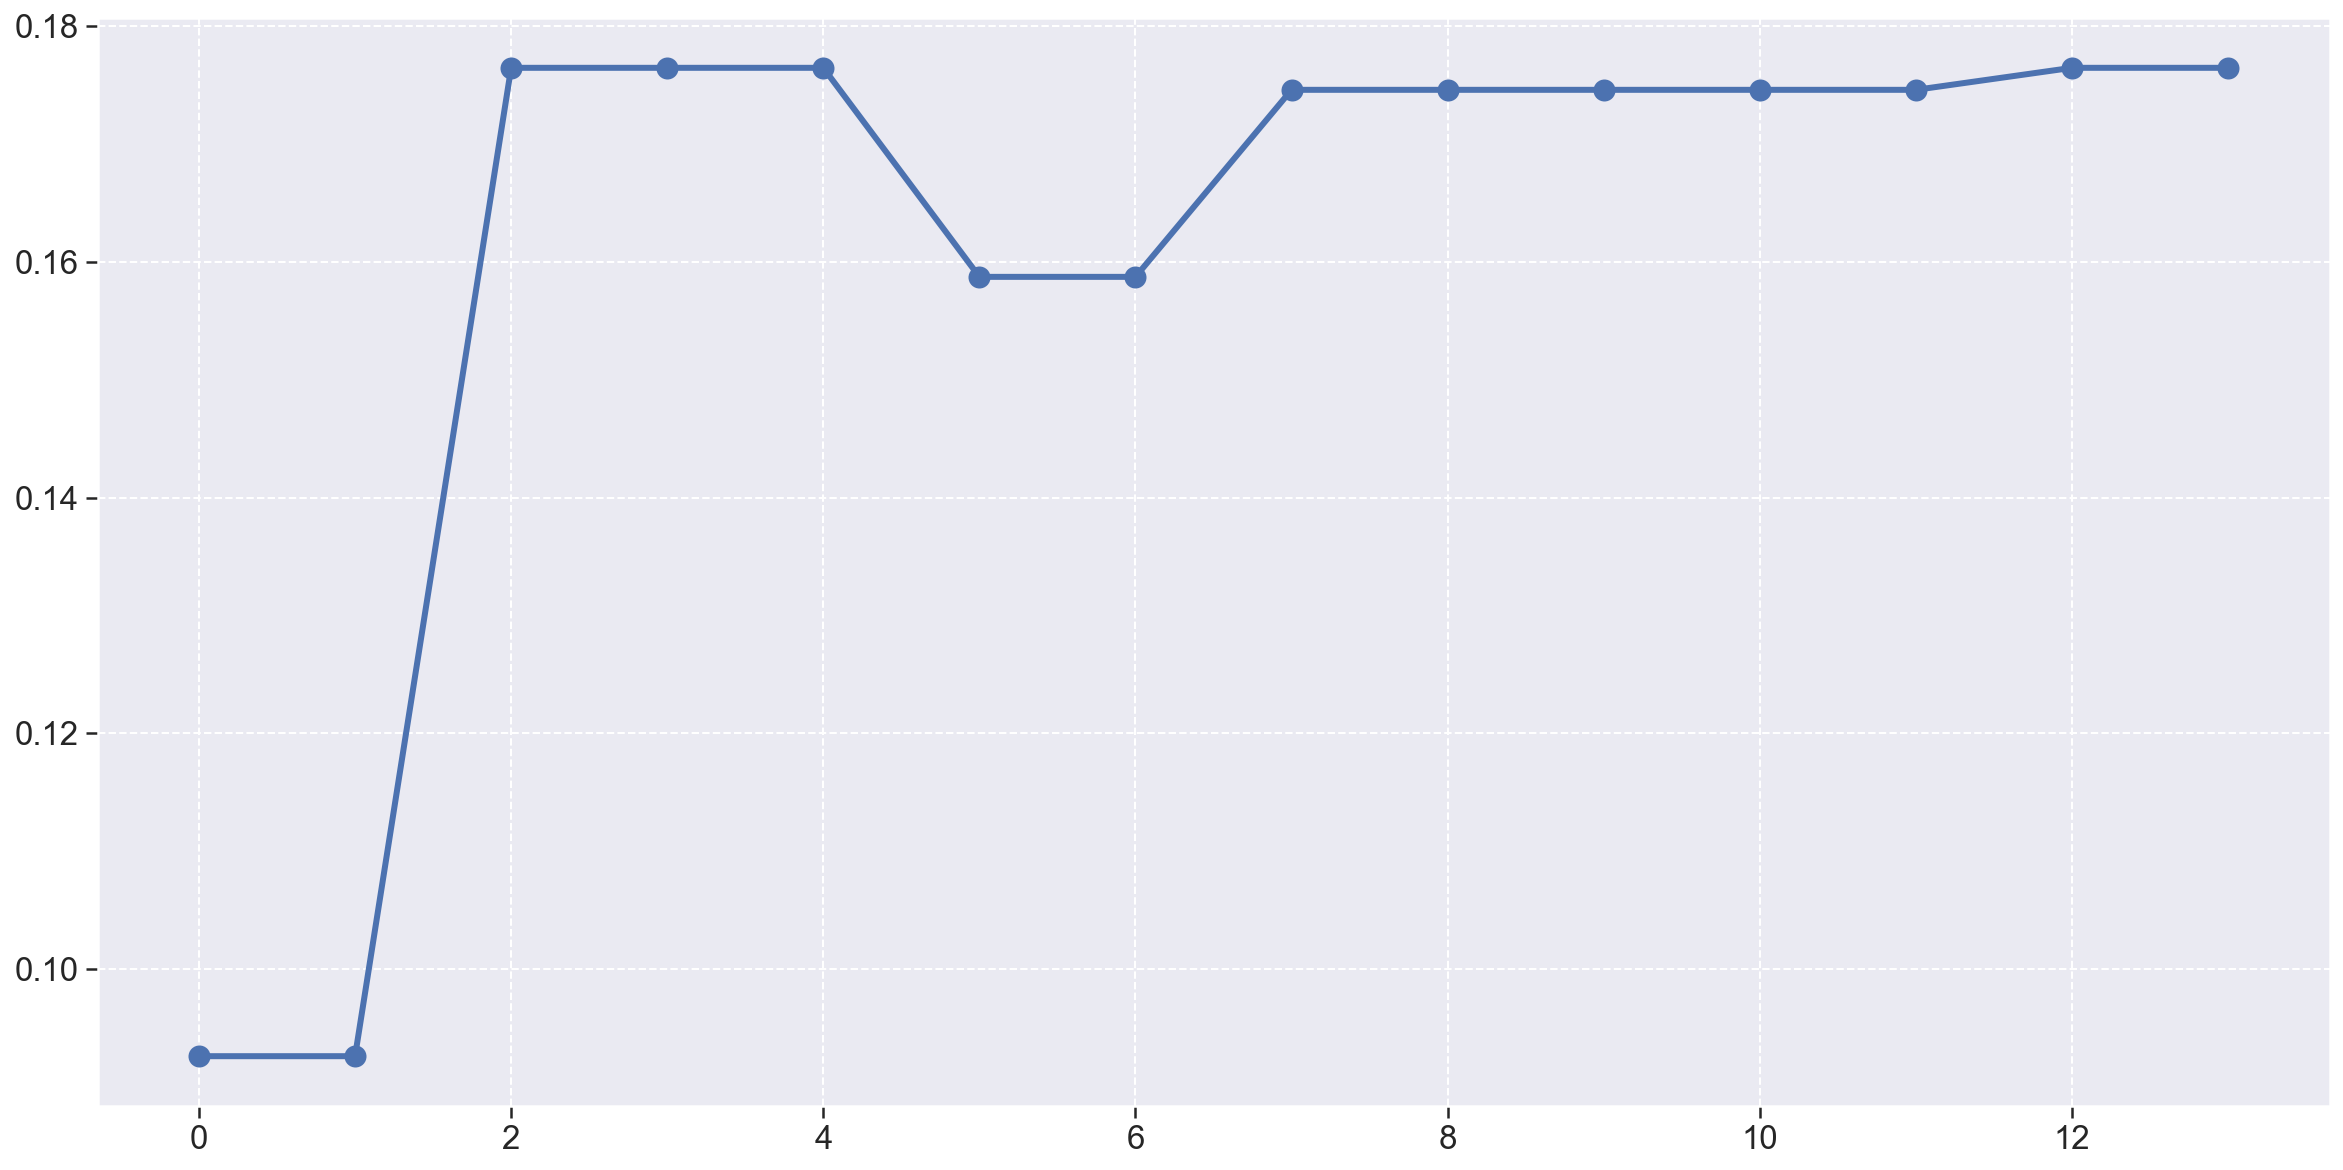

In [27]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repo1_metrics['m1'], linewidth=3, marker='o', markersize=10)

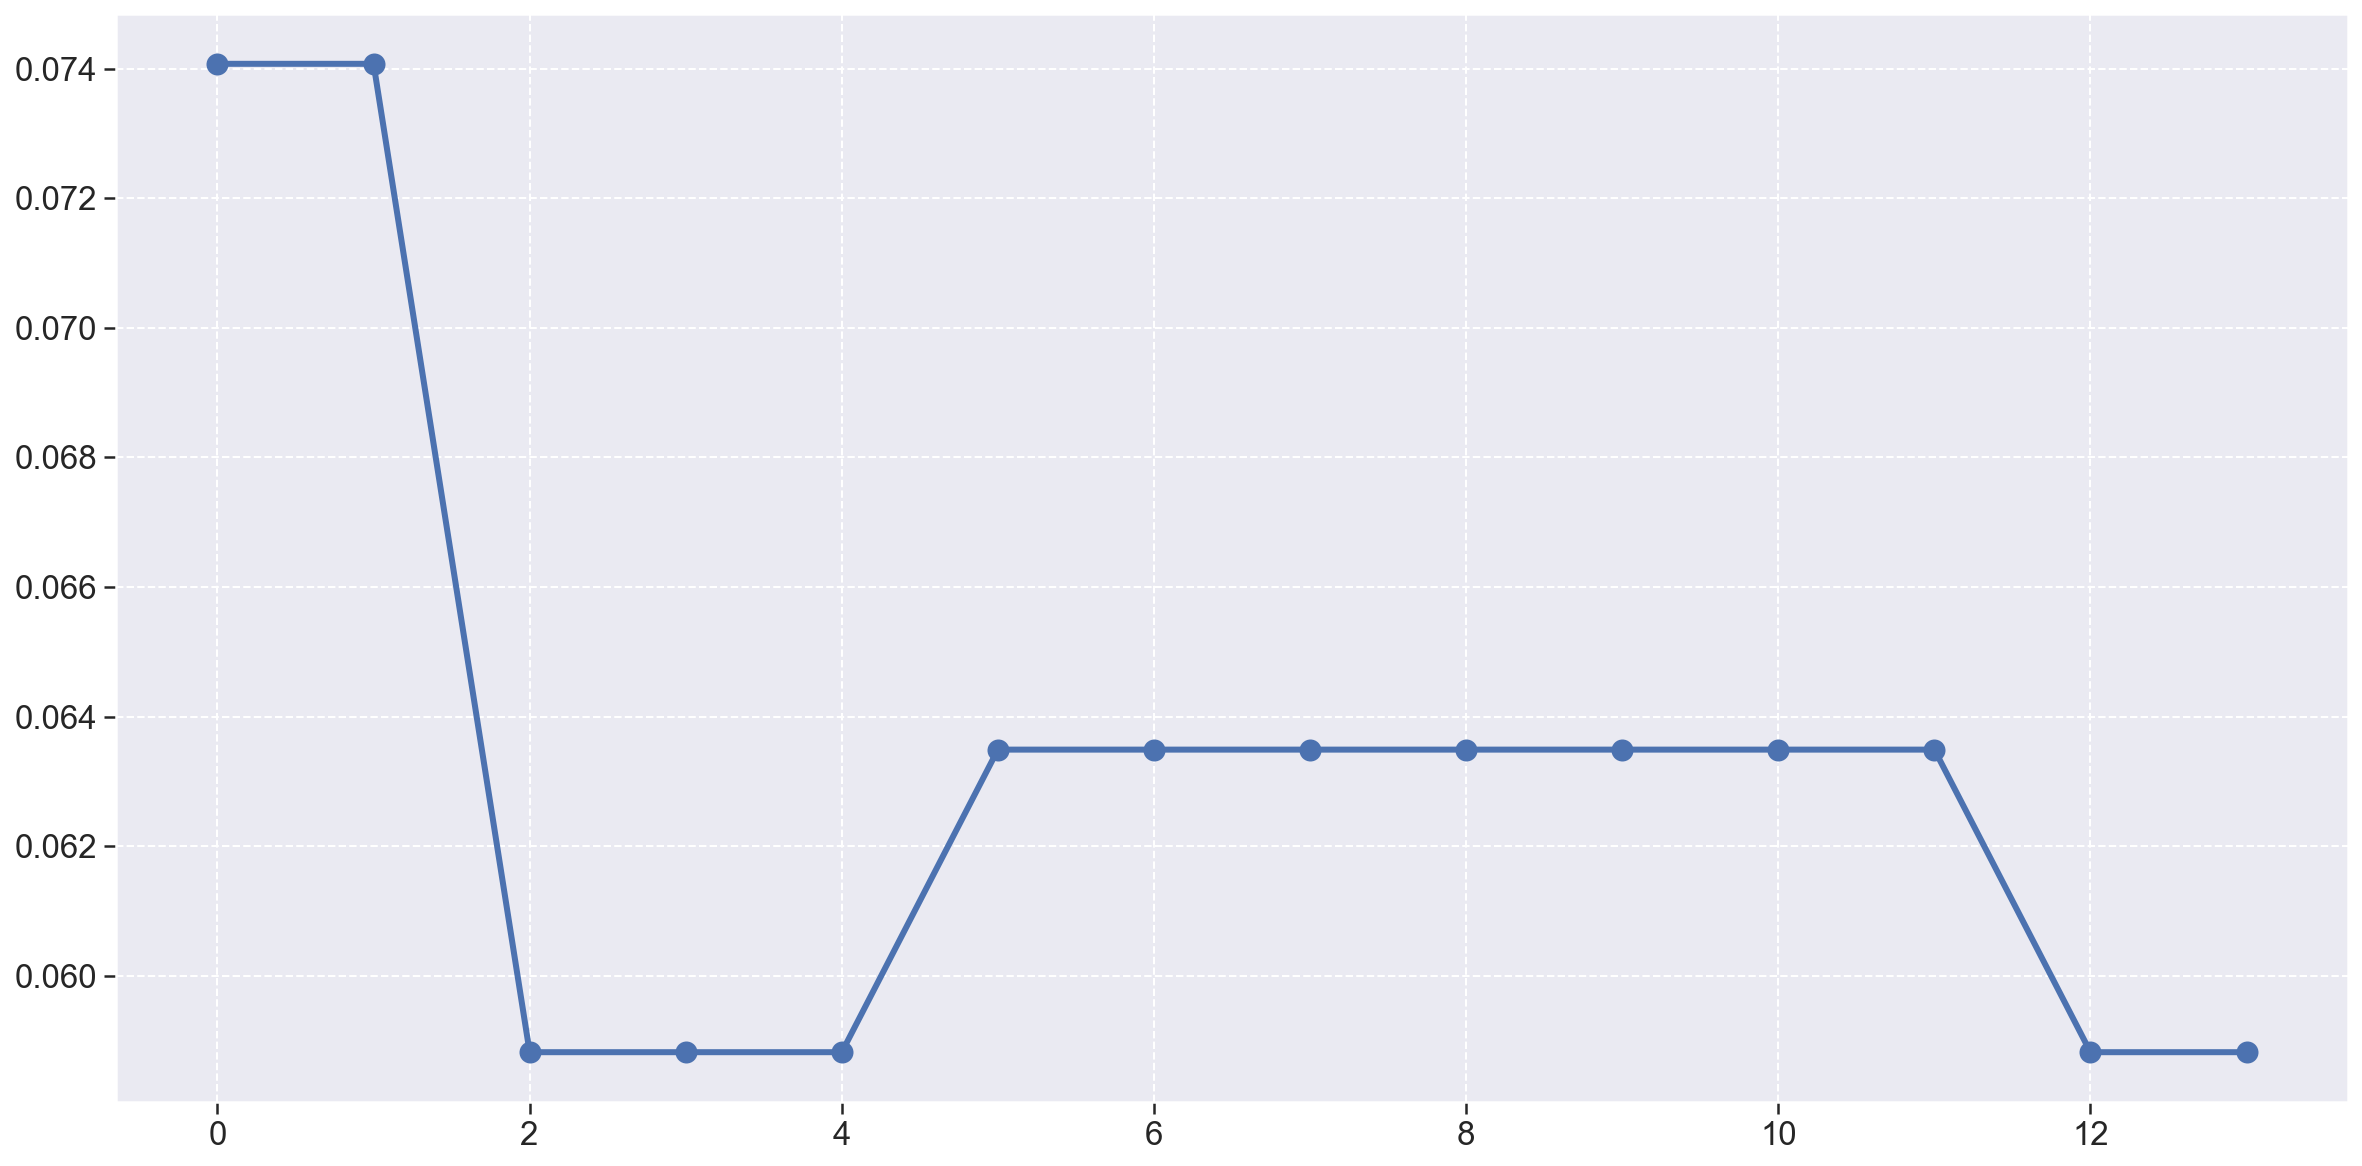

In [28]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repo1_metrics['m2'], linewidth=3, marker='o', markersize=10)

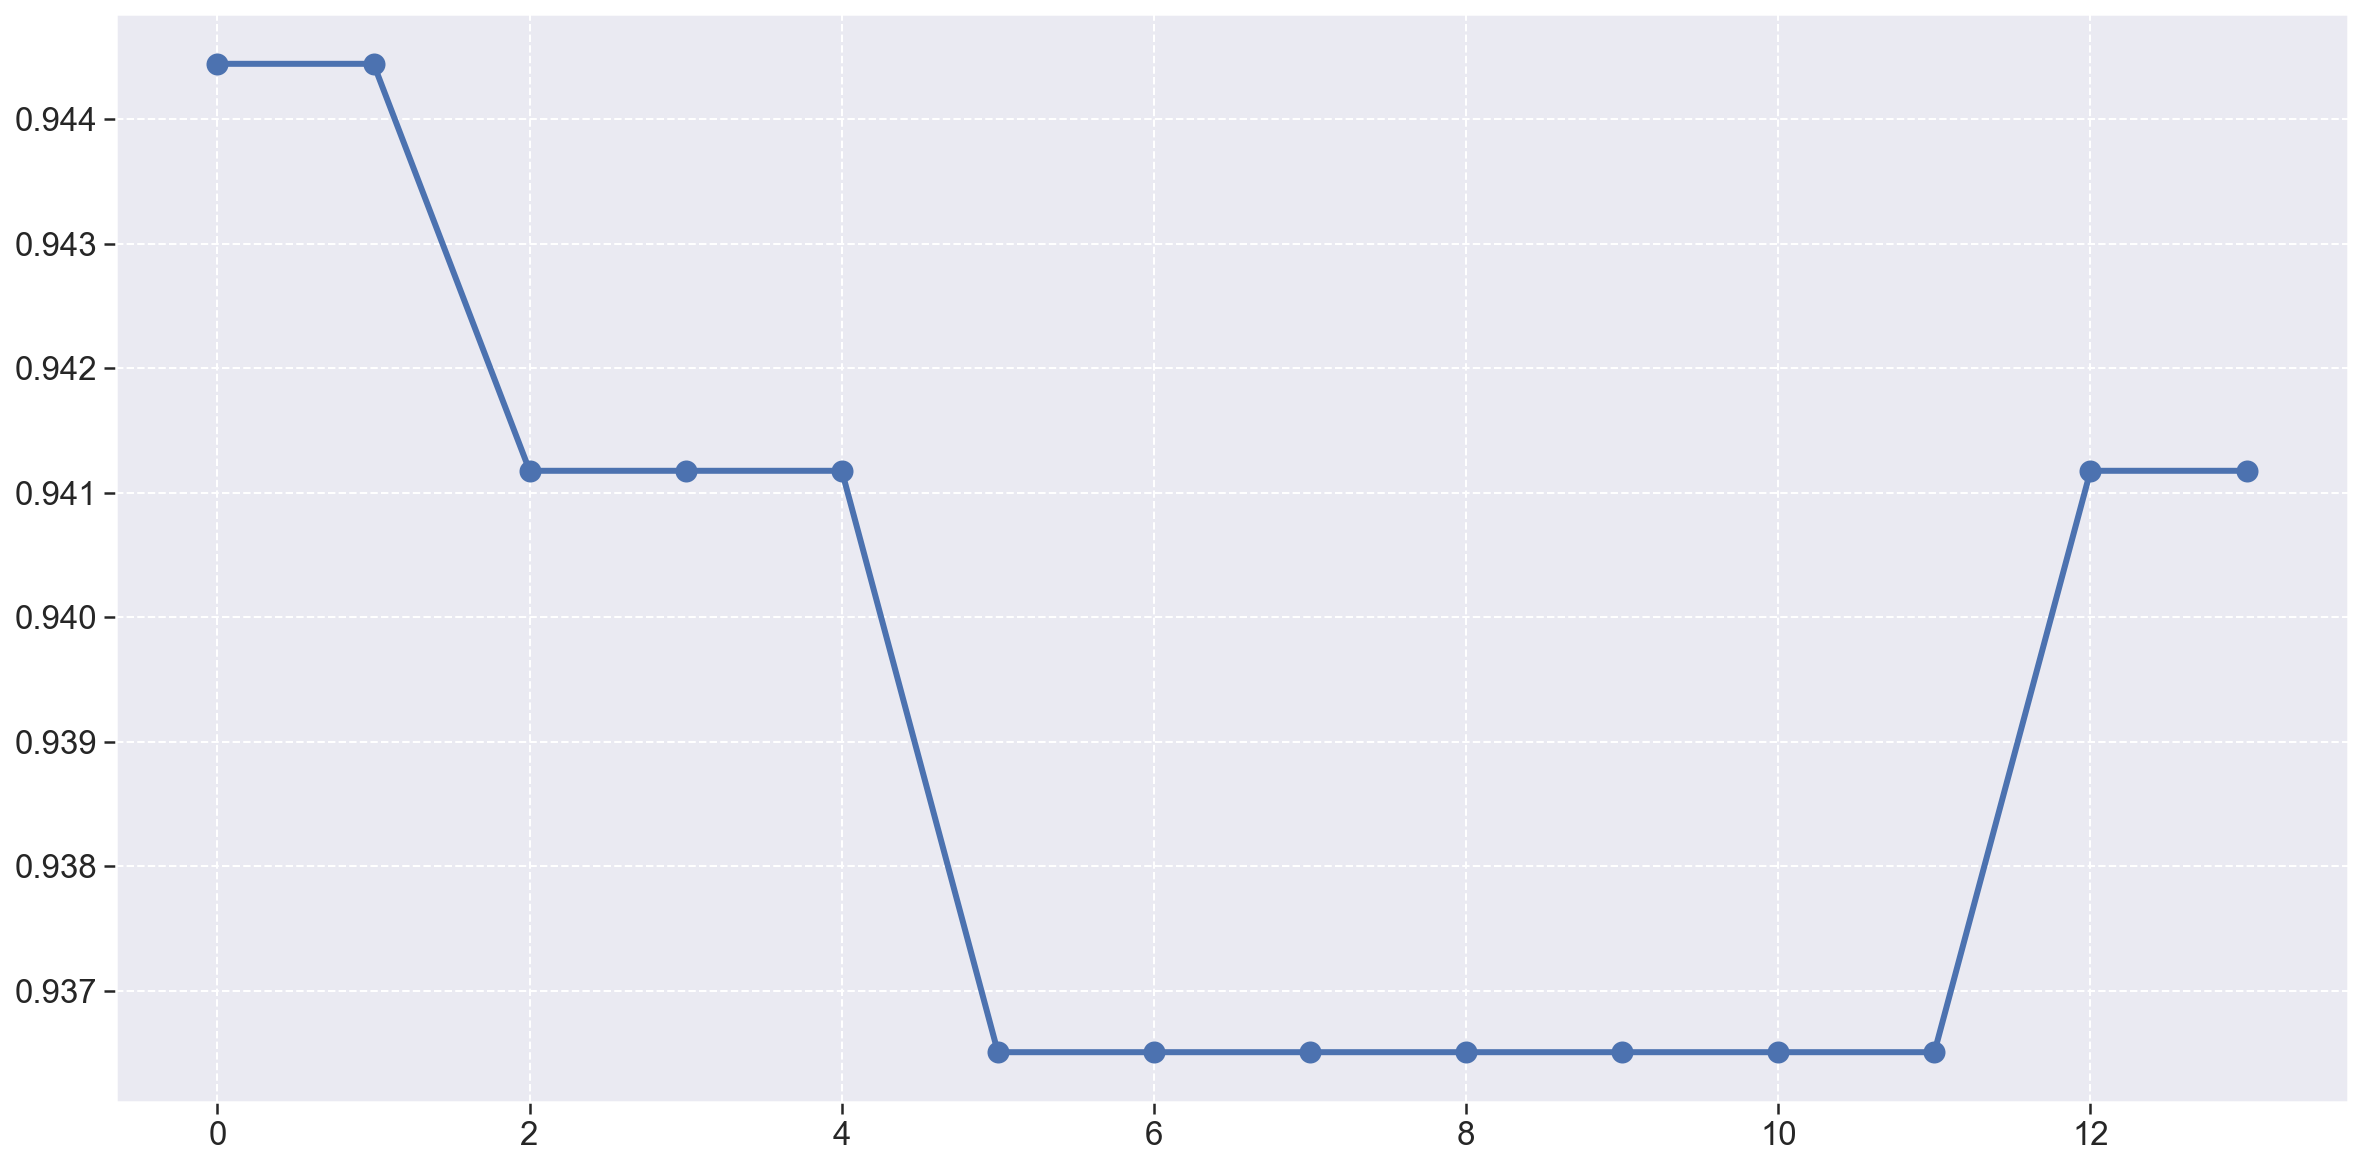

In [29]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repo1_metrics['m3'], linewidth=3, marker='o', markersize=10)

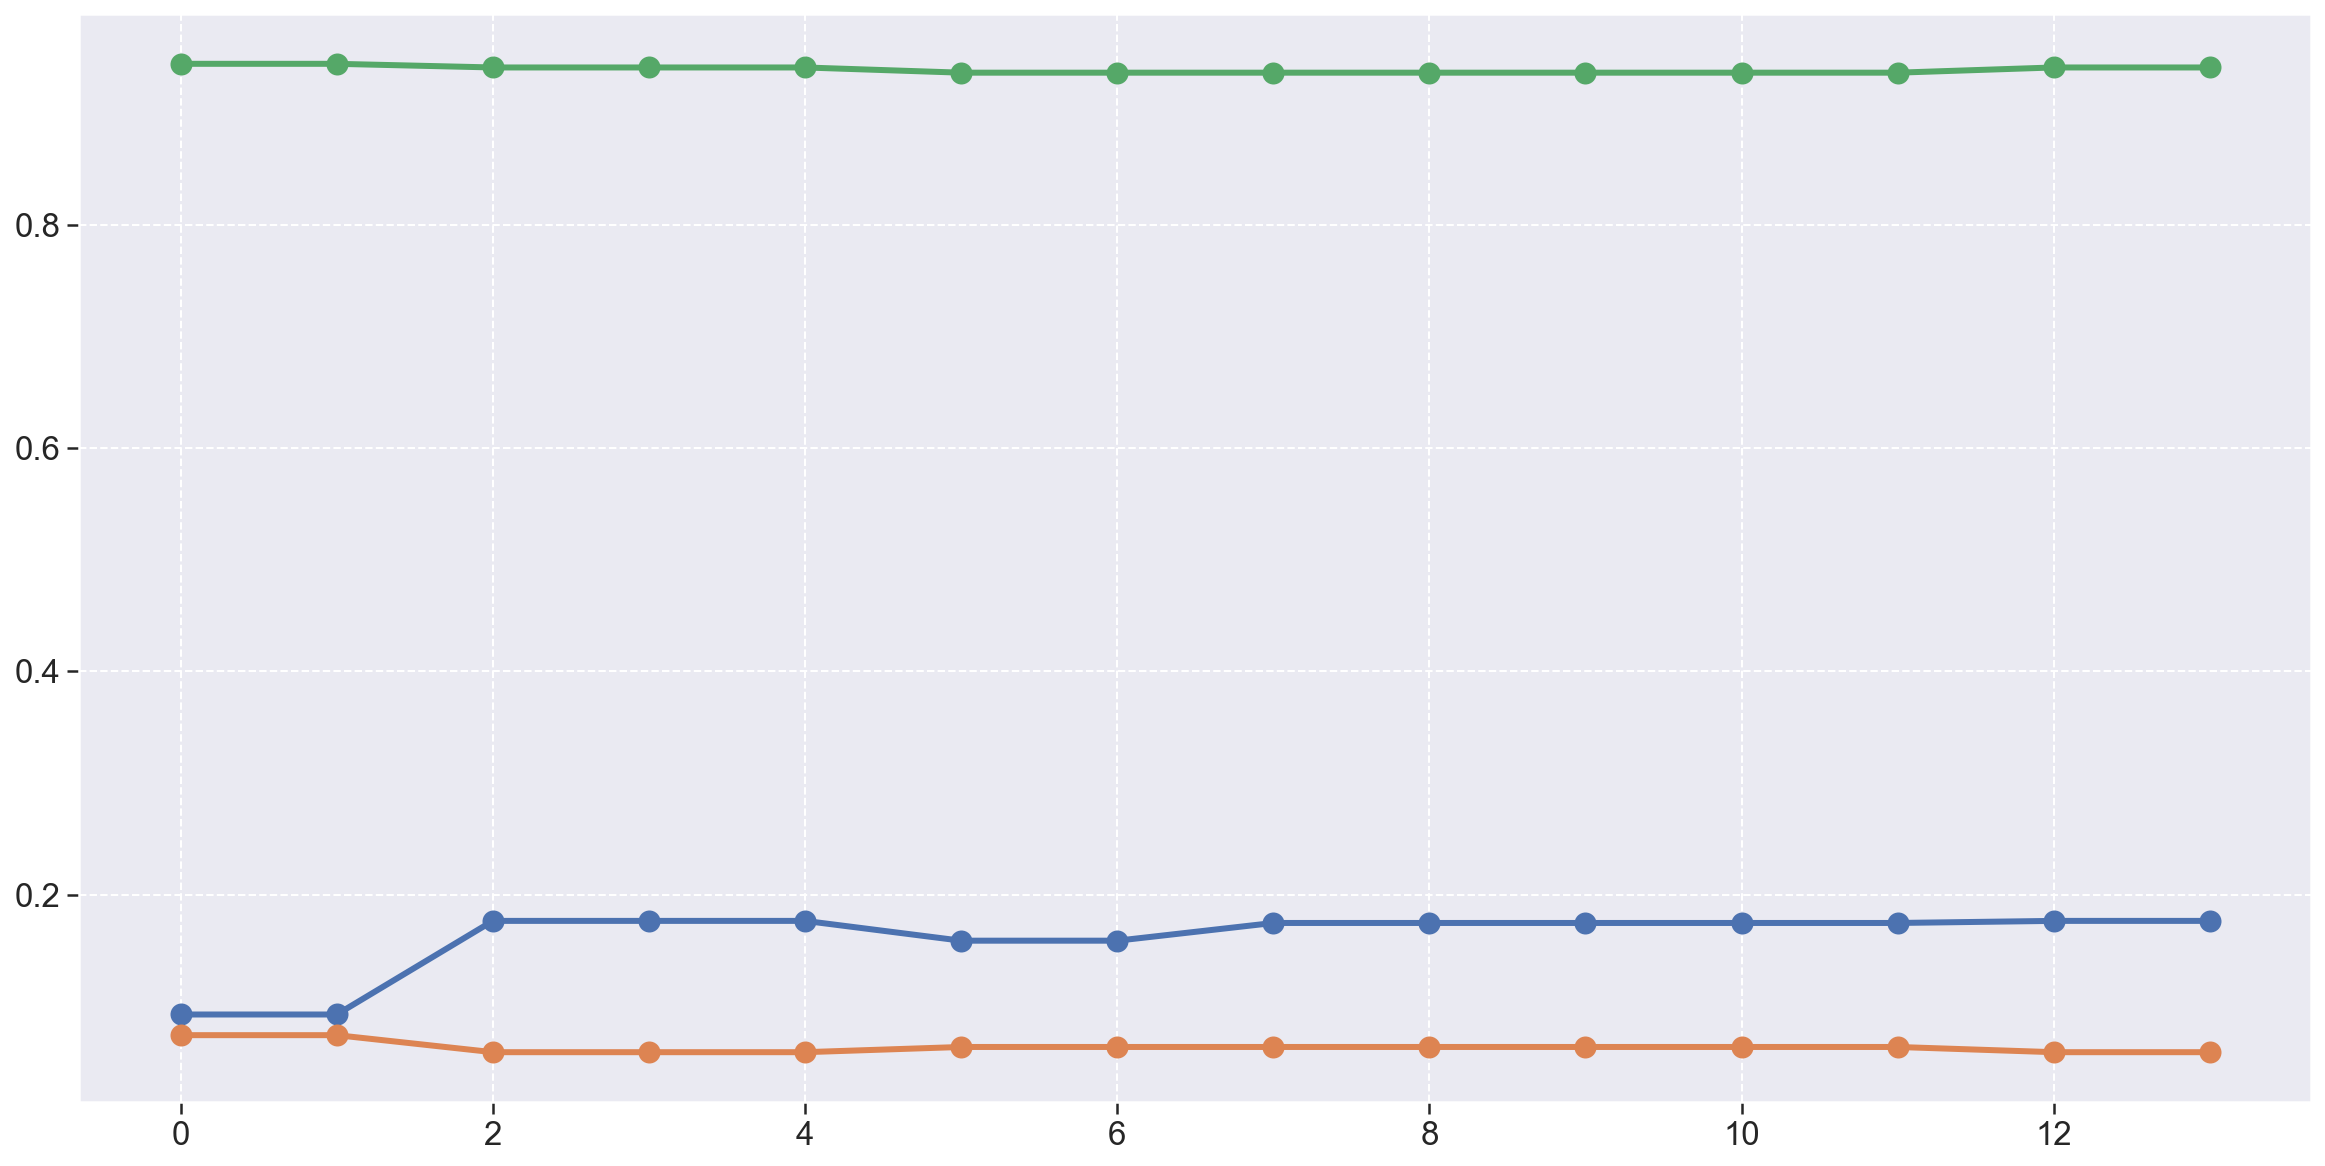

In [30]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repo1_metrics['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(repo1_metrics['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(repo1_metrics['m3'], linewidth=3, marker='o', markersize=10)

### Sub characteristic aggregation

- You must do this for each of your repositories

In [31]:
psc1 = 1
pm1 = 0.33
pm2 = 0.33
pm3 = 0.33

repo1_metrics['asc1'] = ((repo1_metrics['m1']*pm1)+(repo1_metrics['m2']*pm2)+(repo1_metrics['m3']*pm3))*psc1
# Fazer o mesmo para o asc2 (com m7, m8 e m9)

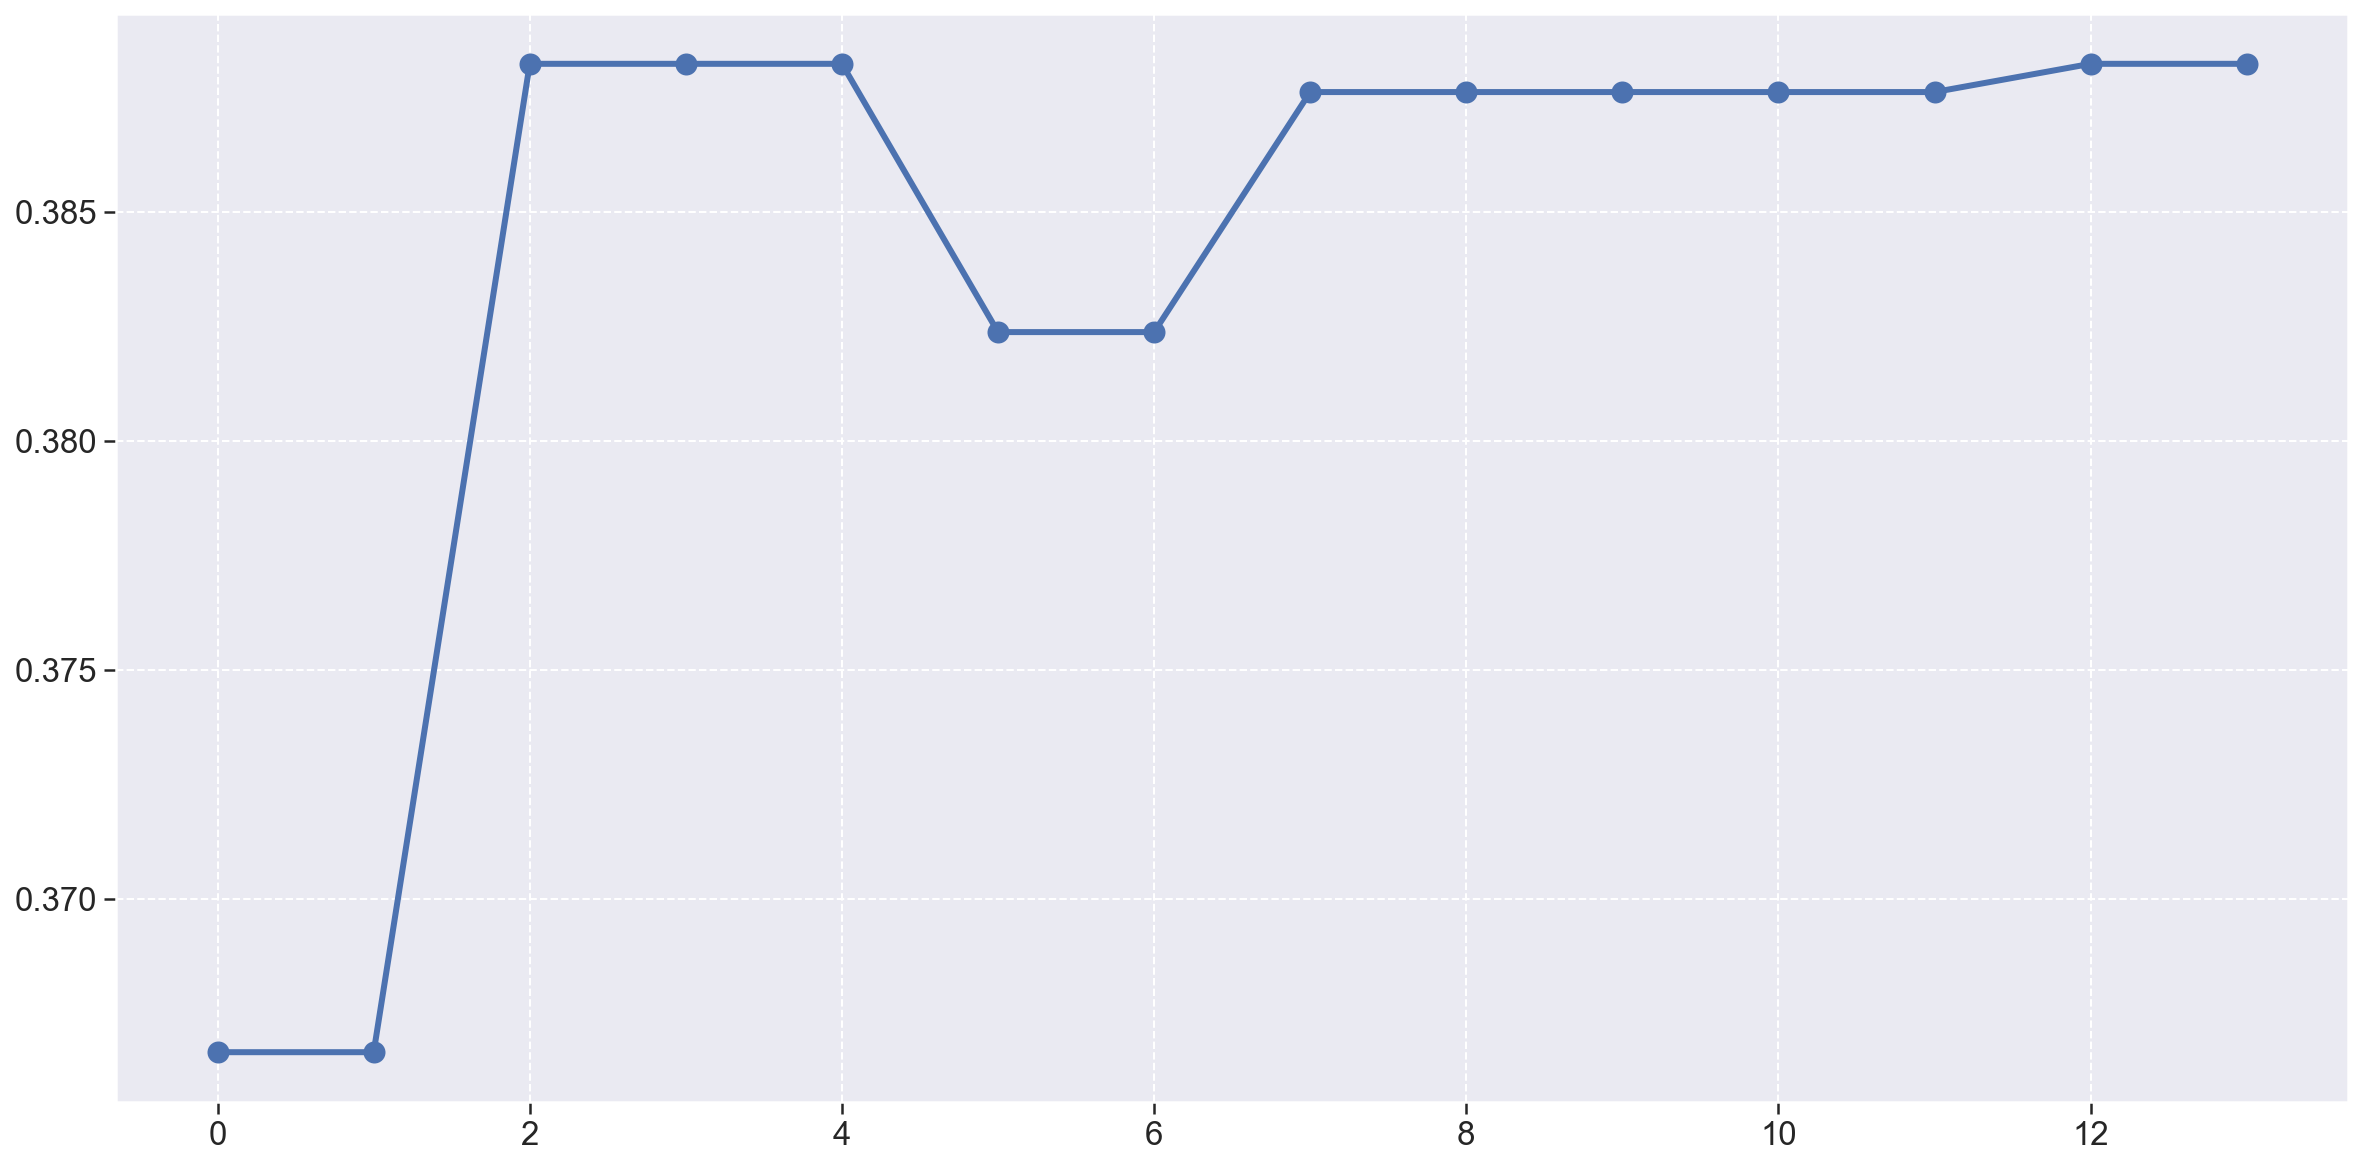

In [32]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repo1_metrics['asc1'], linewidth=3, marker='o', markersize=10)

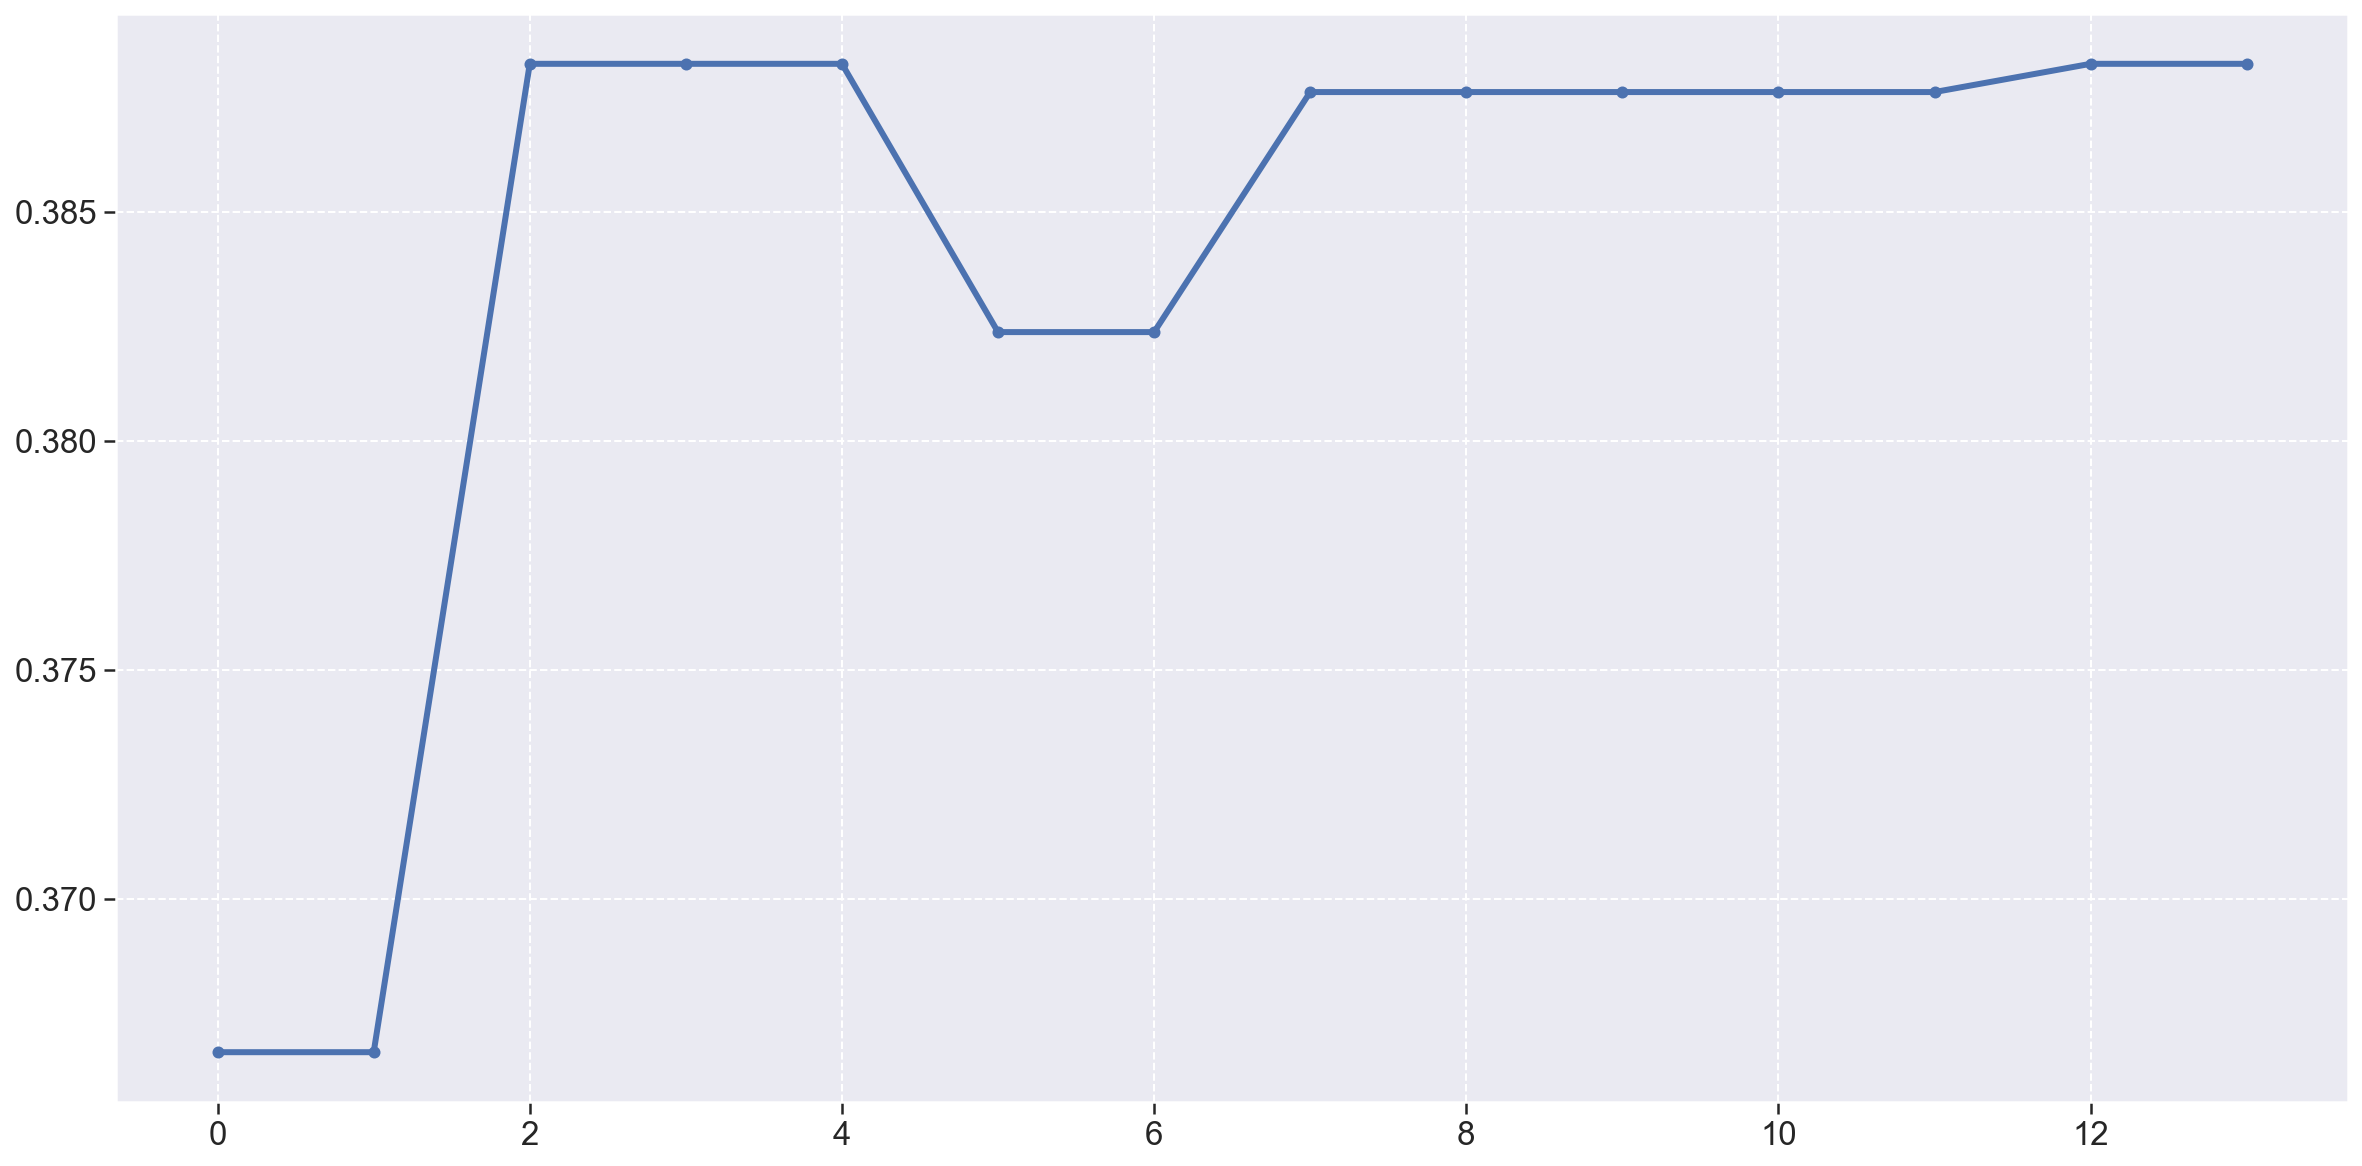

In [33]:
fig = plt.figure(figsize=(20, 10))


plt.plot(repo1_metrics['asc1'], linewidth=3, marker='o', markersize=5)

In [34]:
metrics_df = pd.concat([repo1_metrics], ignore_index=True)

metrics_df['ac1'] = metrics_df['asc1'] * 1
metrics_df['total'] = metrics_df['asc1'] * 1

In [35]:
metrics_df

,m1,m2,m3,repository,version,asc1,ac1,total
0,0.092593,0.074074,0.944444,Desenvolvimento,v1.0.0,0.366667,0.366667,0.366667
1,0.092593,0.074074,0.944444,Desenvolvimento,v1.1.0,0.366667,0.366667,0.366667
2,0.176471,0.058824,0.941176,Desenvolvimento,v1.10.0,0.388235,0.388235,0.388235
3,0.176471,0.058824,0.941176,Desenvolvimento,v1.10.2,0.388235,0.388235,0.388235
4,0.176471,0.058824,0.941176,Desenvolvimento,v1.10.3,0.388235,0.388235,0.388235
5,0.158730,0.063492,0.936508,Desenvolvimento,v1.4.0,0.382381,0.382381,0.382381
6,0.158730,0.063492,0.936508,Desenvolvimento,v1.5.0,0.382381,0.382381,0.382381
7,0.174603,0.063492,0.936508,Desenvolvimento,v1.6.0,0.387619,0.387619,0.387619
8,0.174603,0.063492,0.936508,Desenvolvimento,v1.7.0,0.387619,0.387619,0.387619
9,0.174603,0.063492,0.936508,Desenvolvimento,v1.7.1,0.387619,0.387619,0.387619


In [36]:
metrics_df.to_excel('analytics-raw-data/metrics_df.xlsx', index = False)

In [37]:
# Estatísticas
media_list = []
mediana_list = []
moda_list = []
min_list = []
max_list = []
desvio_list = []
var_list = []
percentile_list = []
metrics = ['m1', 'm2', 'm3']

 

for metric in metrics:
        media_list.append(np.mean(metrics_df[metric]))
        mediana_list.append(np.median(metrics_df[metric]))
        moda_list.append(st.mode(metrics_df[metric]))
        min_list.append(np.amin(metrics_df[metric]))
        max_list.append(np.amax(metrics_df[metric]))
        desvio_list.append(np.std(metrics_df[metric]))
        var_list.append(np.var(metrics_df[metric]))
        percentile_list.append(np.percentile(metrics_df[metric], 0)*100)
        

 


statistics = pd.DataFrame({ 'Medias': media_list,
                            'Medianas': mediana_list,
                            'Modas': moda_list,
                            'Min': min_list,
                            'Max': max_list,
                            'Desvio Padrão': desvio_list,
                            'Variancia': var_list,
                            'Percentil': percentile_list})

 


statistics

,Medias,Medianas,Modas,Min,Max,Desvio Padrão,Variancia,Percentil
0,0.161287,0.174603,"([0.1746031746031746], [5])",0.092593,0.176471,0.028648,0.000821,9.259259
1,0.063336,0.063492,"([0.06349206349206349], [7])",0.058824,0.074074,0.004874,0.000024,5.882353
2,0.939309,0.938842,"([0.9365079365079365], [7])",0.936508,0.944444,0.002989,0.000009,93.650794


In [38]:
# Estatísticas pelo describe
metrics_df.describe()
# Falta a moda e mediana

,m1,m2,m3,asc1,ac1,total
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.161287,0.063336,0.939309,0.384098,0.384098,0.384098
std,0.029730,0.005058,0.003102,0.007652,0.007652,0.007652
min,0.092593,0.058824,0.936508,0.366667,0.366667,0.366667
25%,0.162698,0.058824,0.936508,0.383690,0.383690,0.383690
50%,0.174603,0.063492,0.938842,0.387619,0.387619,0.387619
75%,0.176471,0.063492,0.941176,0.388235,0.388235,0.388235
max,0.176471,0.074074,0.944444,0.388235,0.388235,0.388235


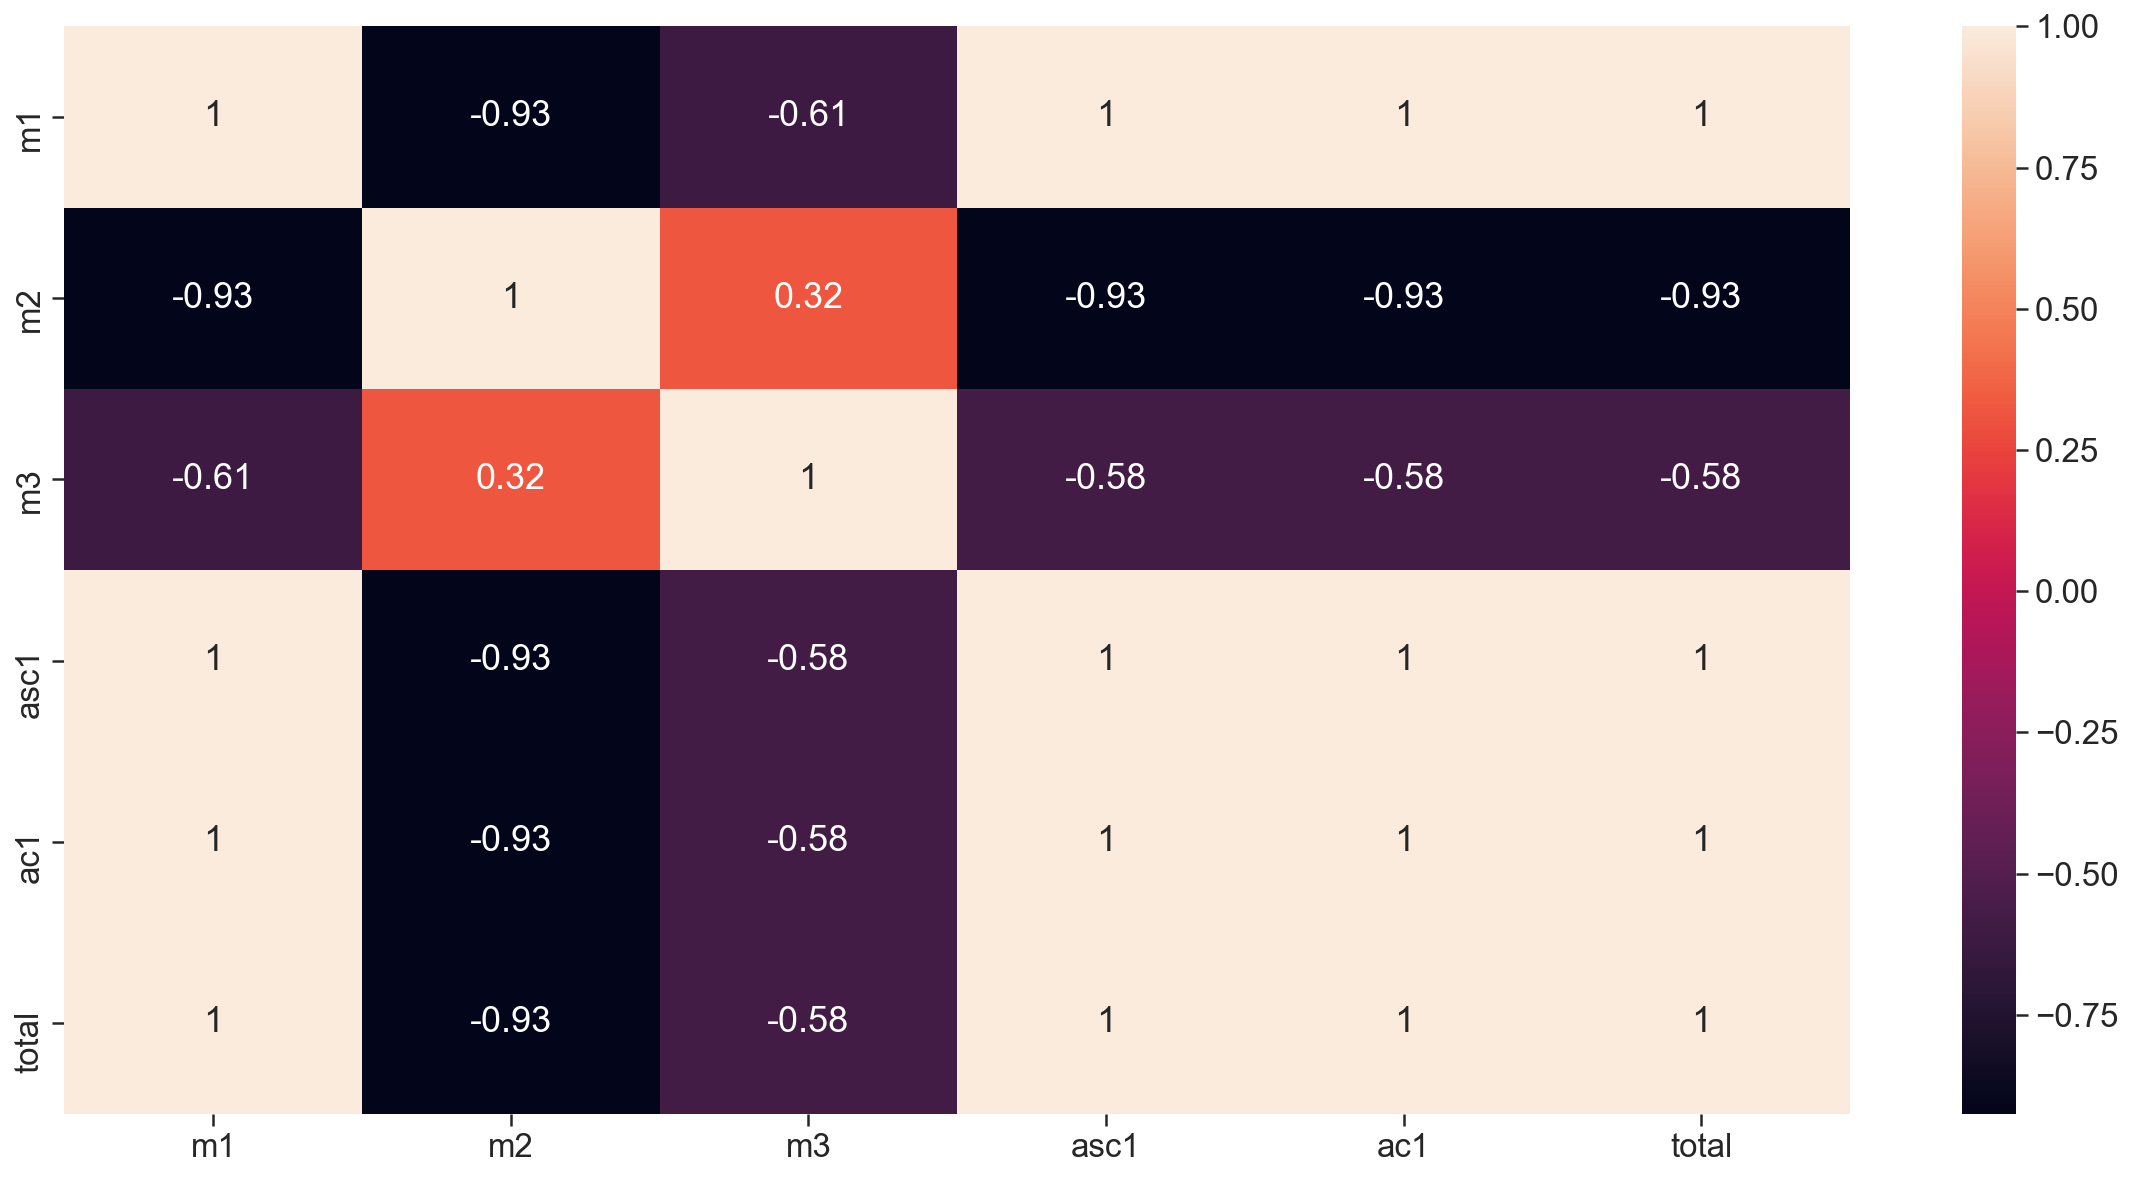

In [39]:
# Matriz de correlação
matriz_corr = metrics_df.corr()

fig = plt.figure(figsize=(20, 10))

sns.heatmap(matriz_corr, annot=True)
plt.show()

<AxesSubplot:>

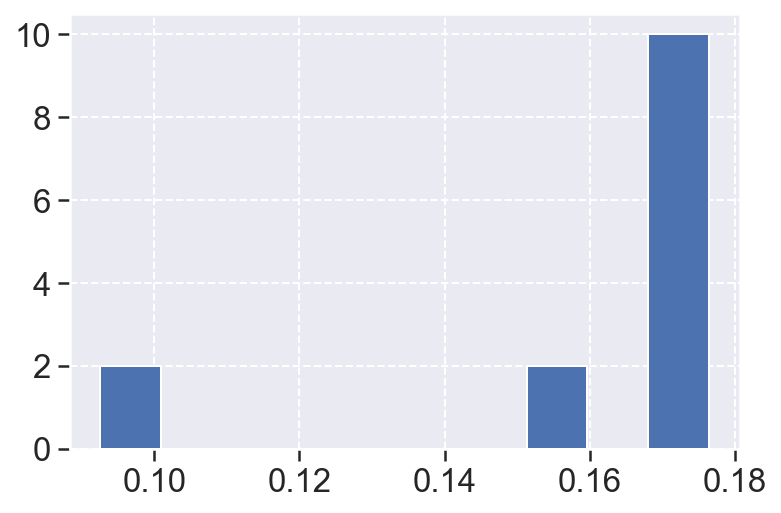

In [40]:
# Histogramas (Fazer também para m7, m8 e m9)
metrics_df['m1'].hist()

<AxesSubplot:>

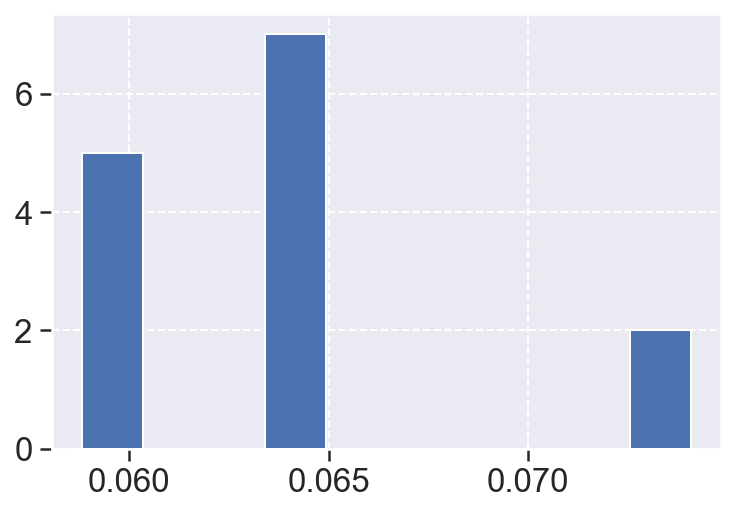

In [41]:
metrics_df['m2'].hist()

<AxesSubplot:>

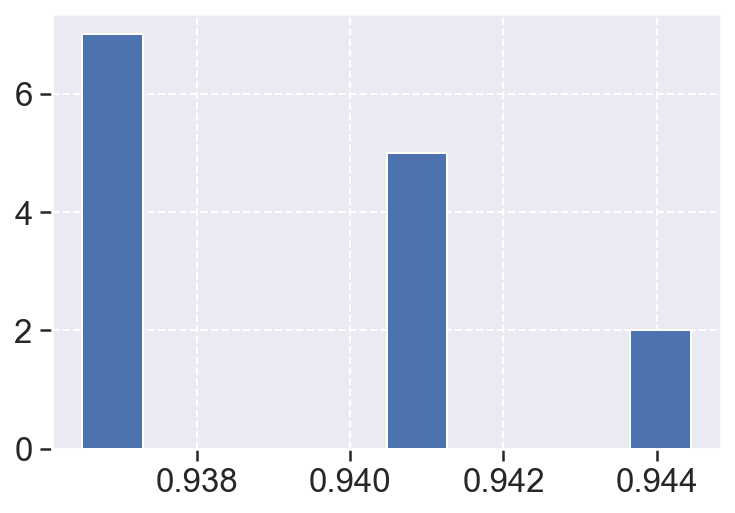

In [42]:
metrics_df['m3'].hist()

<AxesSubplot:>

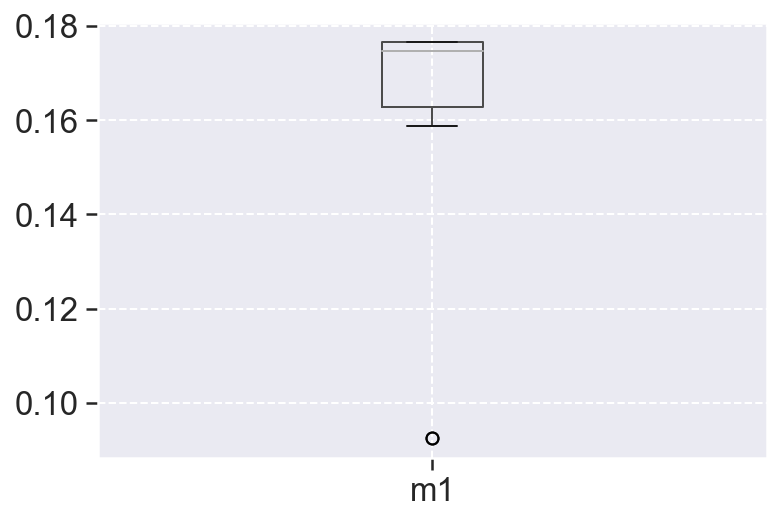

In [43]:
# Boxplots (Fazer também para m7, m8 e m9)
metrics_df[['m1']].boxplot()

<AxesSubplot:>

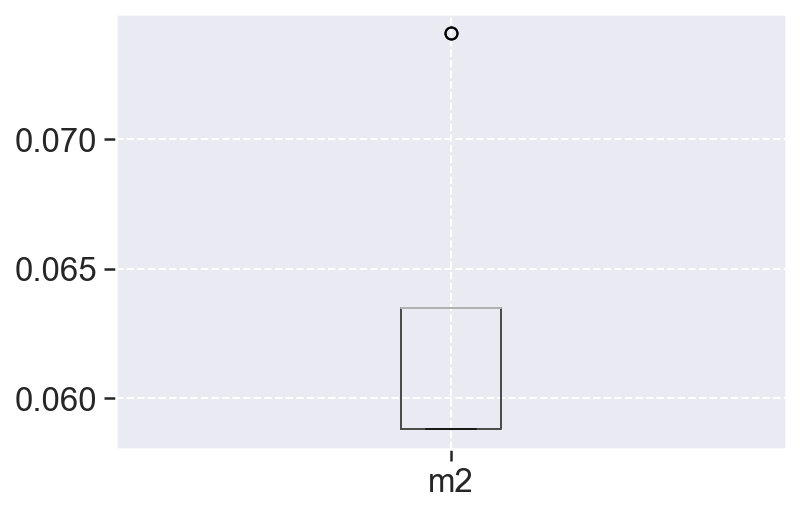

In [44]:
metrics_df[['m2']].boxplot()

<AxesSubplot:>

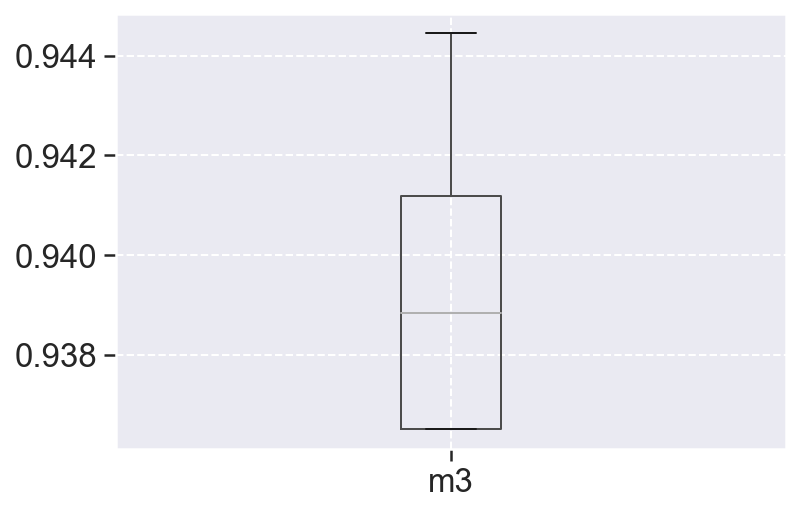

In [45]:
metrics_df[['m3']].boxplot()

In [46]:
# Falta fazer a regressão linear do total asc1 e asc2